nms iou: 0.413 score: 0.3
all weights read
load from yolov4.weights
img shape:  (194, 259, 3)
1/1 [==============================] - 3s 3s/step
# of bboxes: 1


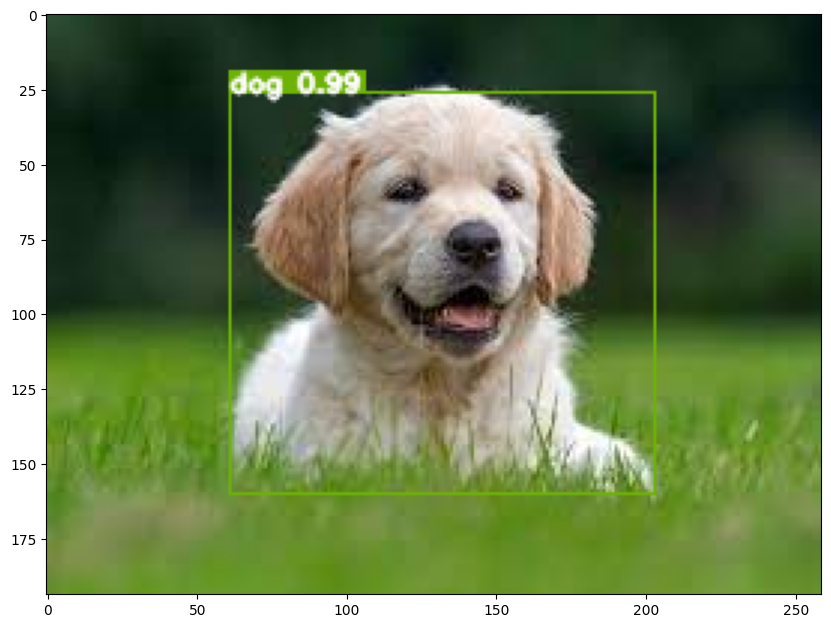

In [1]:
from models import Yolov4

model = Yolov4(weight_path='yolov4.weights',
               class_name_path='class_names/coco_classes.txt')

pred = model.predict('dog.jpg')

In [1]:
from utils import DataGenerator, read_annotation_lines
from models import Yolov4
from config import yolo_config
import sys

#sys.path.append(".")

In [2]:
train_lines, val_lines = read_annotation_lines('data/annotations/annot_small.txt', test_size=0.2)
FOLDER_PATH = 'data/images'
class_name_path = 'class_names/tom_classes.txt'
data_gen_train = DataGenerator(train_lines, class_name_path, FOLDER_PATH)
data_gen_val = DataGenerator(val_lines, class_name_path, FOLDER_PATH)

model = Yolov4(weight_path=None, 
               class_name_path=class_name_path)

#for layer in model.yolo_model.layers[-98:-1]:
#    layer.trainable = False

model.yolo_model.summary()


nms iou: 0.413 score: 0.3
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 416, 416, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 416, 416, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 416, 416, 32  128        ['conv2d[0][0]']                 
 alization)                     )                                 

In [3]:
model.fit(data_gen_train, 
          initial_epoch=0,
          epochs=10, 
          val_data_gen=data_gen_val,
          callbacks=[])

Epoch 1/10
20/20 [==============================] - 247s 11s/step - loss: 35045.4727 - val_loss: 76963.8438
Epoch 2/10
20/20 [==============================] - 214s 11s/step - loss: 1705.9437 - val_loss: 27752.7559
Epoch 3/10
20/20 [==============================] - 213s 11s/step - loss: 977.2001 - val_loss: 11316.7549
Epoch 4/10
20/20 [==============================] - 214s 11s/step - loss: 857.4171 - val_loss: 6370.2842
Epoch 5/10
20/20 [==============================] - 213s 11s/step - loss: 804.5063 - val_loss: 3824.9993
Epoch 6/10
20/20 [==============================] - 211s 11s/step - loss: 788.9016 - val_loss: 2691.9448
Epoch 7/10
20/20 [==============================] - 209s 10s/step - loss: 744.6612 - val_loss: 2218.3682
Epoch 8/10
20/20 [==============================] - 205s 10s/step - loss: 732.7946 - val_loss: 1967.9567
Epoch 9/10
20/20 [==============================] - 202s 10s/step - loss: 705.0837 - val_loss: 1740.2434
Epoch 10/10
20/20 [==============================